# DATA SCIENCE PROJECT 

# 1. INTRODUCTION

Nowdays we consume tons of content on the Internet. There are so many options that sometimes we get indecisive. If only there was a Data Set that could predict if a album, movie or TV series is bad, mediocre, good or excellent... In this notebook we will show you that Data Science can be used in pratical ways to make our life easier and enjoyable.

To do this worksheet we will use tools and algorithmns that the teacher taught in class. We will also use the other worksheets from previous classes.

# 2. REQUIRED LIBRARIES 


As a first step, we will indicate the libraries that we will use to do our work.

    - NumPy: Provides a fast numerical array structure and helper functions.
    - Pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
    - Scikit-learn: The essential Machine Learning package in Python.
    - Matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
    - Seaborn: Advanced statistical plotting library.


In [1]:
%matplotlib inline
import numpy as np
import random
import os
import sys
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as  plt
import pandas as pd
from pandas import read_table, read_csv
import seaborn as sns
import json

# DATA PRE-PROCESSING

First off all, we need to analyse our initial data. 
In the zip that was assigned to us contained:
   - movies.txt (containing the movies we are going to analyze)
   - albums.txt (containing the albums we are going to analyze)
   - tv-shows.txt (containing the TV series we are going to analyze)
   - One python file that is named "extract_movies_info.py" and through that we obtain the "movies.json"

We can modify the python file to obtain the "albums.json" and "tv-shows.json". When we created those files, we noticed a lot of media with errors and missing values. 
   

# Movies

We changed the document to fit the tab and we got this results:

In [2]:
movies = pd.read_json(r'C:\Users\Utilizador\Desktop\IACD\2Semestre\Elementos IACD\EIACD_Assignment2_22_23\media\media\movies.json')
movies=movies.transpose()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
movies.head(280)

FileNotFoundError: File C:\Users\Utilizador\Desktop\IACD\2Semestre\Elementos IACD\EIACD_Assignment2_22_23\media\media\movies.json does not exist

# Albums

In [ ]:
albums = pd.read_json(r'C:\Users\Utilizador\Desktop\IACD\2Semestre\Elementos IACD\EIACD_Assignment2_22_23\media\media\albuns.json')
albums = albums.transpose()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
albums.head(280)

,type,title,criticScore,releaseDate,genres,numOfCriticReviews,artist
Rumours,Album,Rumours [35th Anniversary Deluxe Edition],99,"Jan 29, 2013",[],11,NaN
Ten Freedom Summers,Album,Ten Freedom Summers,99,"May 22, 2012",[Jazz],8,Wadada Leo Smith
Fetch the Bolt Cutters,Album,Fetch the Bolt Cutters,98,"Apr 17, 2020","[Pop/Rock, Adult Alternative Pop/Rock, Alterna...",28,Fiona Apple
SMiLE,Album,SMiLE,97,"Sep 28, 2004","[Rock, Pop]",29,Brian Wilson
Van Lear Rose,Album,Van Lear Rose,97,"Apr 27, 2004",[Country],27,Loretta Lynn
To Pimp A Butterfly,Album,To Pimp A Butterfly,96,"Mar 16, 2015",[Rap],44,Kendrick Lamar
Ghosteen,Album,Ghosteen,96,"Oct 4, 2019",[Pop/Rock],28,Nick Cave & The Bad Seeds
Histoire de Melody Nelson,Album,Histoire de Melody Nelson,96,"Mar 24, 2009","[Rock, Pop]",9,Serge Gainsbourg
DAMN,Album,DAMN.,95,"Apr 14, 2017",[Rap],39,Kendrick Lamar
Stankonia,Album,Stankonia,95,"Oct 31, 2000",[Rap],20,Outkast


# TV-Shows

In [ ]:
tvshows = pd.read_json(r'C:\Users\Utilizador\Desktop\IACD\2Semestre\Elementos IACD\EIACD_Assignment2_22_23\media\media\tv-shows(1).json')
tvshows = tvshows.transpose()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
tvshows.head(280)

,type,title,criticScore,releaseDate,genres,summary,numOfCriticReviews
Game of Thrones,TV-Show,Game of Thrones,86,"April 17, 2011",[Fantasy],Adapted from George R.R. Martin's epic fantasy...,171
Breaking Bad,TV-Show,Breaking Bad,87,"January 20, 2008",[Suspense],Bryan Cranston (Malcolm in the Middle) stars i...,98
Friends,TV-Show,Friends,65,"September 22, 1994",[Comedy],"In 1994, the idea was created for ""Friends"": a...",24
The Sopranos,TV-Show,The Sopranos,94,"January 10, 1999",[Suspense],"Meet Tony Soprano: your average, middle-aged b...",93
Stranger Things,TV-Show,Stranger Things,75,"July 15, 2016",[Science Fiction],"Set in the 1980s Indiana, a young boy named Wi...",108
The Office,TV-Show,The Office,66,"March 24, 2005",[Comedy],Based on the popular British series of the sam...,51
The Crown,TV-Show,The Crown,82,"November 4, 2016",[Drama],The rise of Queen Elizabeth II (Claire Foy) is...,134
The Big Bang Theory,TV-Show,The Big Bang Theory,61,"September 24, 2007",[Comedy],Created by writer/producers Chuck Lorre (of Tw...,27
Black Mirror,TV-Show,Black Mirror,76,"December 4, 2011",[Science Fiction],Originally aired in the UK in 2011 and a winne...,66
The Walking Dead,TV-Show,The Walking Dead,79,"October 31, 2010",[Science Fiction],Based on a comic book series of the same name ...,115


# ALL

In [ ]:
df = pd.read_json(r'C:\Users\Utilizador\Desktop\IACD\2Semestre\Elementos IACD\EIACD_Assignment2_22_23\media\media\merge.json')

In [ ]:
df=df.transpose()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
df.head(280)

,type,title,criticScore,releaseDate,genres,summary,numOfCriticReviews,director,cast,rating,runtime,artist
Game of Thrones,TV-Show,Game of Thrones,86,"April 17, 2011",[Fantasy],Adapted from George R.R. Martin's epic fantasy...,171,NaN,NaN,NaN,NaN,NaN
Breaking Bad,TV-Show,Breaking Bad,87,"January 20, 2008",[Suspense],Bryan Cranston (Malcolm in the Middle) stars i...,98,NaN,NaN,NaN,NaN,NaN
Friends,TV-Show,Friends,65,"September 22, 1994",[Comedy],"In 1994, the idea was created for ""Friends"": a...",24,NaN,NaN,NaN,NaN,NaN
The Sopranos,TV-Show,The Sopranos,94,"January 10, 1999",[Suspense],"Meet Tony Soprano: your average, middle-aged b...",93,NaN,NaN,NaN,NaN,NaN
Stranger Things,TV-Show,Stranger Things,75,"July 15, 2016",[Science Fiction],"Set in the 1980s Indiana, a young boy named Wi...",108,NaN,NaN,NaN,NaN,NaN
The Office,TV-Show,The Office,66,"March 24, 2005",[Comedy],Based on the popular British series of the sam...,51,NaN,NaN,NaN,NaN,NaN
The Crown,TV-Show,The Crown,82,"November 4, 2016",[Drama],The rise of Queen Elizabeth II (Claire Foy) is...,134,NaN,NaN,NaN,NaN,NaN
The Big Bang Theory,TV-Show,The Big Bang Theory,61,"September 24, 2007",[Comedy],Created by writer/producers Chuck Lorre (of Tw...,27,NaN,NaN,NaN,NaN,NaN
Black Mirror,TV-Show,Black Mirror,76,"December 4, 2011",[Science Fiction],Originally aired in the UK in 2011 and a winne...,66,NaN,NaN,NaN,NaN,NaN
The Walking Dead,TV-Show,The Walking Dead,79,"October 31, 2010",[Science Fiction],Based on a comic book series of the same name ...,115,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()
#descrição do dataframe

,type,title,criticScore,releaseDate,genres,summary,numOfCriticReviews,director,cast,rating,runtime,artist
count,262,262,262,262,262,182,262,110,110,110,110,79
unique,3,262,50,259,64,121,76,77,108,12,72,69
top,Movie,Game of Thrones,92,"October 21, 2016",[Drama],,20,[Steven Spielberg],[],R,120 min,Eminem
freq,110,1,18,2,30,62,11,6,3,51,5,3


In [ ]:
df['criticScore'] = df['criticScore'].astype(float)
df['numOfCriticReviews'] = df['numOfCriticReviews'].astype(float)

In [ ]:
print(df.dtypes)

type                   object
title                  object
criticScore           float64
releaseDate            object
genres                 object
summary                object
numOfCriticReviews    float64
director               object
cast                   object
rating                 object
runtime                object
artist                 object
dtype: object


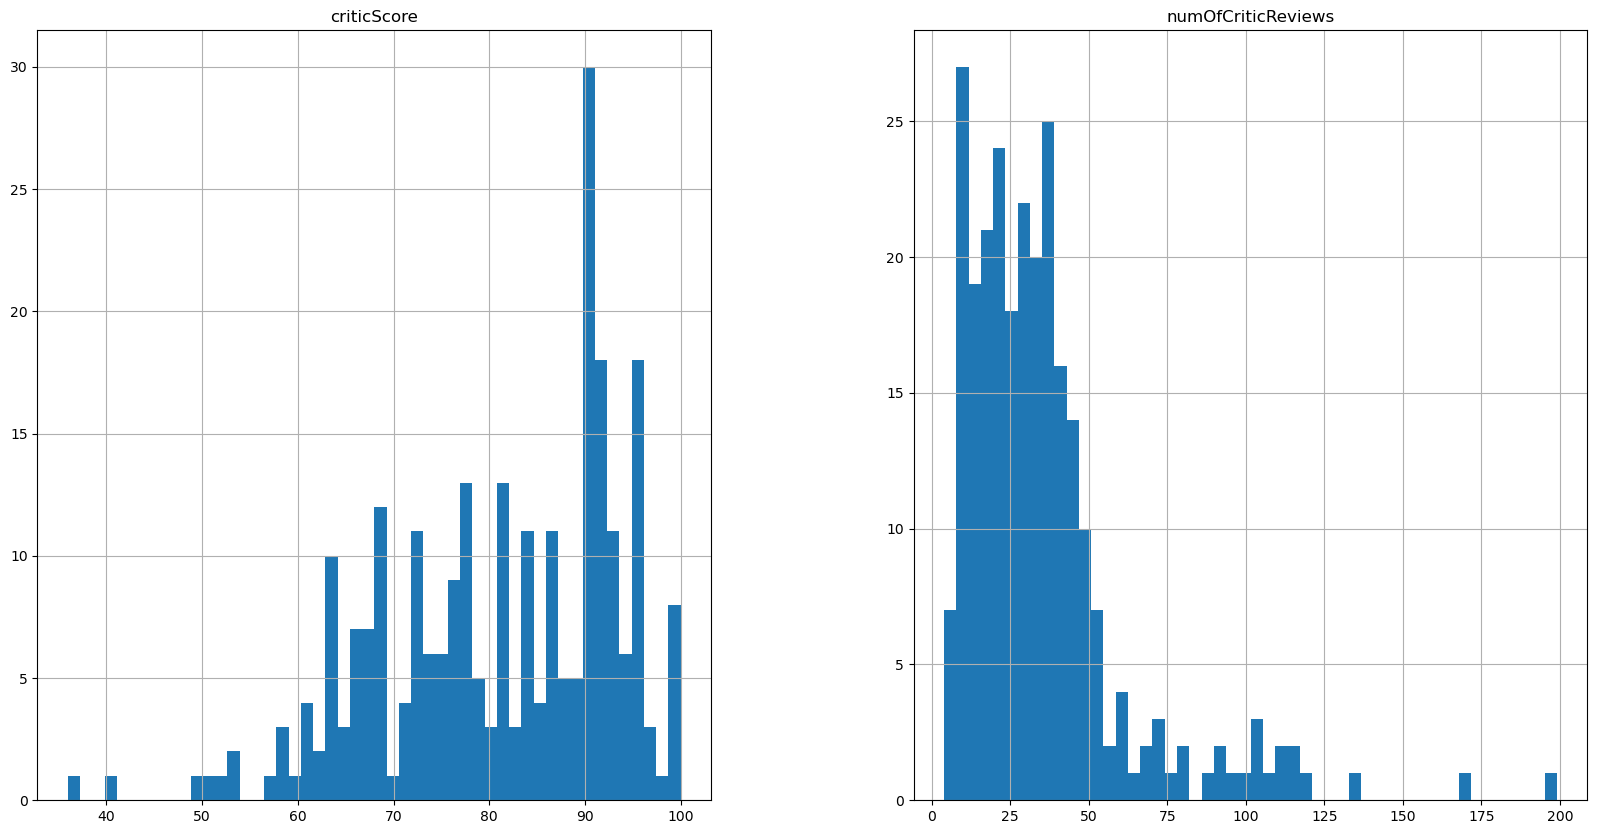

In [ ]:
df.hist(bins=50, figsize=(20,10))
plt.show()

Gráfico que representa a distribuição do criticScore e numOfCriticReviews pelo data

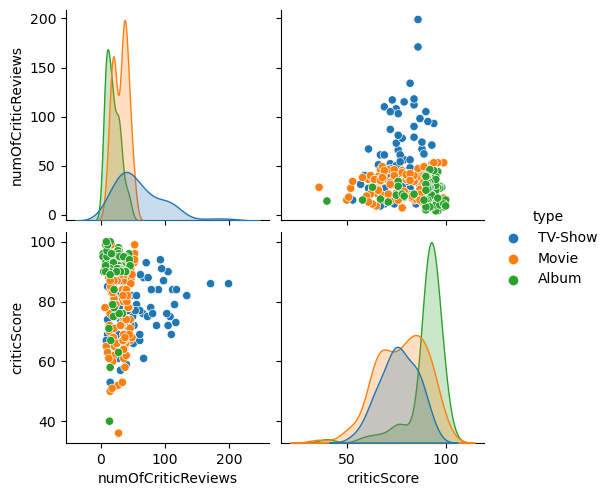

In [ ]:
sns.pairplot(df[['numOfCriticReviews', 'criticScore','type']], hue='type')

Comparason between criticScore and numOfCriticReviews

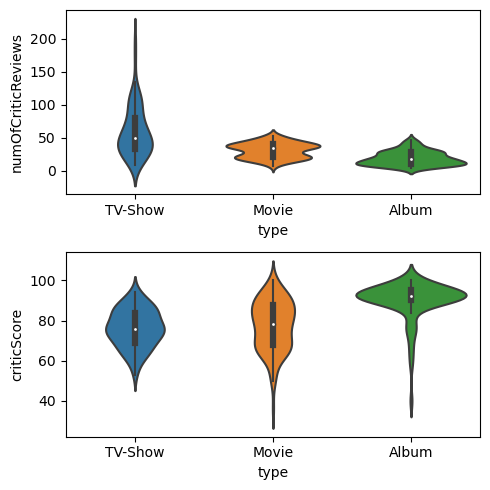

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(5, 5))

variables = ['numOfCriticReviews', 'criticScore']

for index, variable in enumerate(variables):
    plt.subplot(2, 1, index + 1)
    sb.violinplot(x='type', y=variable, data=df)

plt.tight_layout()
plt.show()


R-squared: 0.006338060617005248


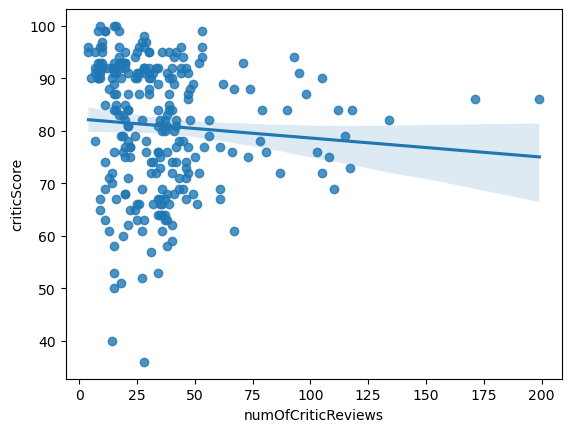

In [ ]:
sns.regplot(x=df["numOfCriticReviews"], y=df["criticScore"])
correlation = df["numOfCriticReviews"].corr(df["criticScore"])
r_squared = correlation ** 2

# Display R-squared value
print("R-squared:", r_squared)

Correlation between numOfCriticReviews and CriticScore

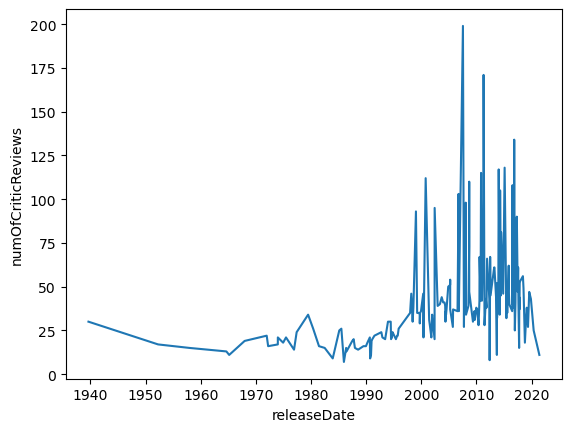

In [ ]:
# Assuming 'releaseDate' is the column name containing the date strings
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%B %d, %Y', errors='coerce')

# Handle the dates in 'Sep17, 2011' format separately
df['releaseDate'] = df['releaseDate'].fillna(pd.to_datetime(df['releaseDate'], format='%b%d, %Y', errors='coerce'))
sns.lineplot(x='releaseDate', y='numOfCriticReviews', data=df)
plt.show()


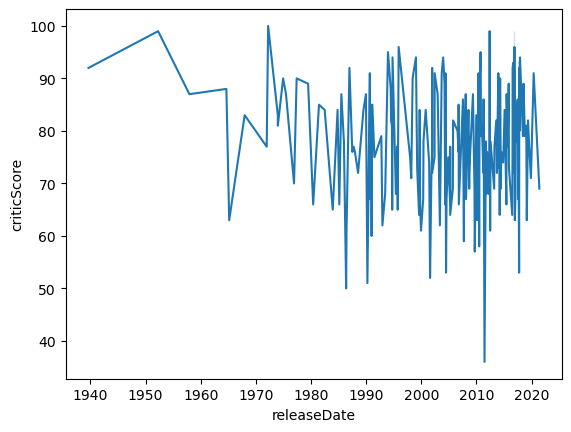

In [ ]:
# Handle the dates in 'Sep17, 2011' format separately
df['releaseDate'] = df['releaseDate'].fillna(pd.to_datetime(df['releaseDate'], format='%b%d, %Y', errors='coerce'))
sns.lineplot(x='releaseDate', y='criticScore', data=df)
plt.show()


In [ ]:
bins = [0, 40, 60, 80, 100]
labels = ['Bad','Mediocre', 'Good', 'Excellent']
df['score_class'] = pd.cut(df['criticScore'], bins=bins, labels=labels)

df['type'] = df['type'].replace({'Movie': 1, 'Album': 2, 'TV-Show': 3})
df['type'] = df['type'].astype(int)

df = df.sample(frac=1.0, random_state=1)

df_new = df.drop('criticScore', axis=1)
df_new.rename(columns={'score_class': 'criticScore'}, inplace=True)
df_new.head(280)

,type,title,releaseDate,genres,summary,numOfCriticReviews,director,cast,rating,runtime,artist,criticScore
The Dutchess,2,The Dutchess,NaT,"[Pop, R&B]",NaN,15.0,NaN,NaN,NaN,NaN,Fergie,Mediocre
Seinfeld,3,Seinfeld,1989-07-05,[Comedy],"This is a show about nothing; however, for a s...",16.0,NaN,NaN,NaN,NaN,NaN,Excellent
The Dark Knight Rises,1,The Dark Knight Rises,2012-07-20,[Crime],It has been eight years since Batman vanished ...,45.0,[Christopher Nolan],"[Anne Hathaway, Christian Bale, Gary Oldman, J...",PG-13,165 min,NaN,Good
Atlanta,3,Atlanta,2016-09-06,[Music],"Earnest ""Earn"" Marks (Donald Glover) returns t...",71.0,NaN,NaN,NaN,NaN,NaN,Excellent
No Cities to Love,2,No Cities to Love,NaT,"[Pop/Rock, Alternative/Indie Rock, Indie Rock]",NaN,39.0,NaN,NaN,NaN,NaN,Sleater-Kinney,Excellent
The Lord of the Rings: The Two Towers,1,The Lord of the Rings: The Two Towers,2002-12-18,[Fantasy],,39.0,[Peter Jackson],[Andy Serkis],PG-13,179 min,NaN,Excellent
Is This It?,2,Is This It?,NaT,"[Rock, Alternative]",NaN,26.0,NaN,NaN,NaN,NaN,The Strokes,Excellent
Nevermind,2,Nevermind [20th Anniversary Edition],NaT,"[Rock, Grunge, Alternative/Indie Rock]",NaN,15.0,NaN,NaN,NaN,NaN,Nirvana,Excellent
1989,2,1989,NaT,[Pop/Rock],NaN,29.0,NaN,NaN,NaN,NaN,Taylor Swift,Good
Goodfellas,1,Goodfellas,1990-09-01,[Crime],,21.0,[Martin Scorsese],"[Joe Pesci, Lorraine Bracco, Paul Sorvino, Ray...",R,146 min,NaN,Excellent


# DECISION TREE

In [ ]:
all_inputs = df_new[['numOfCriticReviews','type']].values
all_labels = df_new['criticScore'].values
all_inputs[:20]

array([[ 15.,   2.],
       [ 16.,   3.],
       [ 45.,   1.],
       [ 71.,   3.],
       [ 39.,   2.],
       [ 39.,   1.],
       [ 26.,   2.],
       [ 15.,   2.],
       [ 29.,   2.],
       [ 21.,   1.],
       [ 15.,   2.],
       [ 36.,   1.],
       [ 14.,   1.],
       [ 40.,   3.],
       [ 41.,   1.],
       [ 34.,   3.],
       [  8.,   2.],
       [108.,   3.],
       [ 21.,   1.],
       [ 62.,   3.]])

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30, random_state=1)

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Handle missing values
imputer = SimpleImputer()
training_inputs = imputer.fit_transform(training_inputs)
testing_inputs = imputer.transform(testing_inputs)

# Scale the features
scaler = StandardScaler()
training_inputs = scaler.fit_transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier= DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.6962025316455697

In [ ]:
# Make predictions on the testing set
predictions = decision_tree_classifier.predict(testing_inputs)

# Compare the predicted labels with the actual labels
correct_predictions = predictions == testing_classes

# Print the incorrectly predicted samples with their corresponding titles
print("Incorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if not correct:
        title = df_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

# Print the correctly predicted samples with their corresponding titles
print("\nCorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if correct:
        title = df_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")



Incorrectly predicted samples:
Title: The Dutchess, Predicted=Bad, Actual=Good
Title: Seinfeld, Predicted=Excellent, Actual=Good
Title: 1989, Predicted=Excellent, Actual=Good
Title: Die Hard, Predicted=Good, Actual=Excellent
Title: The Terminator, Predicted=Excellent, Actual=Good
Title: Master of None, Predicted=Excellent, Actual=Good
Title: The Shawshank Redemption, Predicted=Good, Actual=Excellent
Title: Lady Bird, Predicted=Excellent, Actual=Good
Title: Conflict Of Interest, Predicted=Good, Actual=Excellent
Title: DAMN., Predicted=Excellent, Actual=Good
Title: Physical Graffiti [Remastered], Predicted=Excellent, Actual=Mediocre
Title: Garden State, Predicted=Excellent, Actual=Good
Title: Better Call Saul, Predicted=Good, Actual=Excellent
Title: Drive, Predicted=Good, Actual=Mediocre
Title: Chernobyl, Predicted=Good, Actual=Excellent
Title: Jaws, Predicted=Excellent, Actual=Good
Title: The Leftovers, Predicted=Good, Actual=Excellent
Title: Curb Your Enthusiasm, Predicted=Excellent, A

''

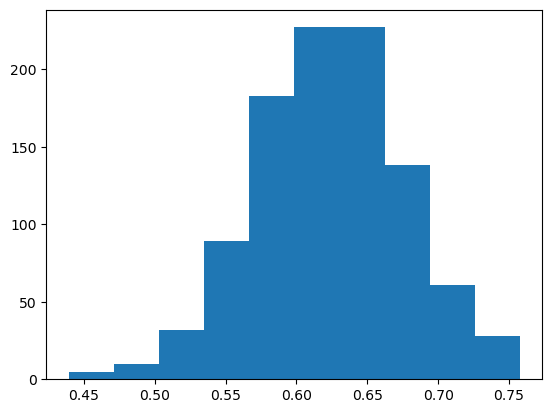

In [ ]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

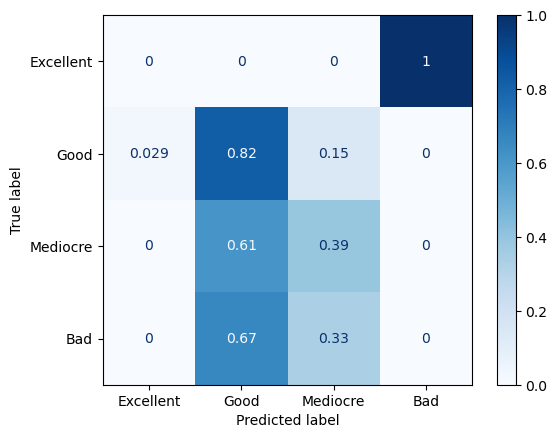

In [ ]:
display = ConfusionMatrixDisplay.from_estimator(
    decision_tree_classifier,
    testing_inputs,
    testing_classes,
    display_labels=['Excellent','Good','Mediocre','Bad'],
    cmap=plt.cm.Blues,
    normalize='true'
)

# DECISION TREE WITH MOVIES

In [ ]:
bins = [0, 40, 60, 80, 100]
labels = ['Bad','Mediocre', 'Good', 'Excellent']
movies['score_class'] = pd.cut(df['criticScore'], bins=bins, labels=labels)
# Assuming 'movies' is your DataFrame and 'releaseDate' is the column name
movies['releaseDate'] = pd.to_datetime(movies['releaseDate'])
min_date = movies['releaseDate'].min()
max_date = movies['releaseDate'].max()

# Calculate the range of dates
date_range = max_date - min_date

# Convert the date column to a numerical representation
movies['releaseDate'] = (movies['releaseDate'] - min_date) / date_range

movies_new = movies.drop('criticScore', axis=1)
movies_new.rename(columns={'score_class': 'criticScore'}, inplace=True)
movies_new.head(280)

,title,type,releaseDate,director,genres,cast,rating,runtime,summary,numOfCriticReviews,criticScore
The Godfather,The Godfather,Movie,0.413022,[Francis Ford Coppola],[Crime],"[Al Pacino, Marlon Brando]",R,175 min,Francis Ford Coppola's epic features Marlon Br...,16,Excellent
The Shawshank Redemption,The Shawshank Redemption,Movie,0.697487,[Frank Darabont],[Crime],"[Morgan Freeman, Tim Robbins]",R,142 min,"Wrongly convicted, Andy Dufresne (Tim Robbins)...",21,Excellent
The Dark Knight,The Dark Knight,Movie,0.873421,[Christopher Nolan],[Crime],"[Aaron Eckhart, Christian Bale, Heath Ledger]",PG-13,152 min,Batman raises the stakes in his war on crime. ...,39,Excellent
The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,Movie,0.790018,[Peter Jackson],[Fantasy],"[Andy Serkis, Elijah Wood]",PG-13,178 min,,34,Excellent
Pulp Fiction,Pulp Fiction,Movie,0.698980,[Quentin Tarantino],[Crime],"[Bruce Willis, John Travolta, Samuel L. Jackson]",R,154 min,,24,Excellent
Star Wars: Episode IV - A New Hope,Star Wars: Episode IV - A New Hope,Movie,0.478551,[George Lucas],[Fantasy],"[Carrie Fisher, Harrison Ford, Mark Hamill]",PG,121 min,"A long time ago in a galaxy far, far away... P...",24,Excellent
Forrest Gump,Forrest Gump,Movie,0.695509,[Robert Zemeckis],[Romance],"[Gary Sinise, Robin Wright, Sally Field, Tom H...",PG-13,142 min,,20,Excellent
Inception,Inception,Movie,0.898688,[Christopher Nolan],[Thriller],"[Elliot Page, Joseph Gordon-Levitt, Ken Watana...",PG-13,148 min,"Dom Cobb is a skilled thief, the absolute best...",42,Good
The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,Movie,0.815285,[Peter Jackson],[Fantasy],"[Andy Serkis, Orlando Bloom]",PG-13,201 min,Sauron's forces have laid siege to Minas Tirit...,41,Excellent
The Matrix,The Matrix,Movie,0.755519,"[Andy Wachowski, Lana Wachowski]",[Thriller],"[Carrie-Anne Moss, Keanu Reeves, Laurence Fish...",R,136 min,,35,Good


In [ ]:
all_inputs = movies_new[['numOfCriticReviews','releaseDate']].values
all_labels = movies_new['criticScore'].values

from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Handle missing values
imputer = SimpleImputer()
training_inputs = imputer.fit_transform(training_inputs)
testing_inputs = imputer.transform(testing_inputs)

# Scale the features
scaler = StandardScaler()
training_inputs = scaler.fit_transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)


0.6071428571428571

In [ ]:
# Make predictions on the testing set
predictions = decision_tree_classifier.predict(testing_inputs)

# Compare the predicted labels with the actual labels
correct_predictions = predictions == testing_classes

# Print the incorrectly predicted samples with their corresponding titles
print("Incorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if not correct:
        title = movies_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

# Print the correctly predicted samples with their corresponding titles
print("\nCorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if correct:
        title = movies_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

Incorrectly predicted samples:
Title: The Godfather, Predicted=Excellent, Actual=Good
Title: Pulp Fiction, Predicted=Excellent, Actual=Good
Title: Titanic, Predicted=Excellent, Actual=Mediocre
Title: The Silence of the Lambs, Predicted=Good, Actual=Excellent
Title: Goodfellas, Predicted=Excellent, Actual=Good
Title: The Departed, Predicted=Excellent, Actual=Good
Title: The Lord of the Rings: The Two Towers, Predicted=Bad, Actual=Good
Title: Gladiator, Predicted=Excellent, Actual=Mediocre
Title: The Godfather: Part II, Predicted=Excellent, Actual=Good
Title: Saving Private Ryan, Predicted=Good, Actual=Excellent
Title: Seven, Predicted=Excellent, Actual=Good

Correctly predicted samples:
Title: The Shawshank Redemption, Predicted=Excellent, Actual=Excellent
Title: The Dark Knight, Predicted=Good, Actual=Good
Title: The Lord of the Rings: The Fellowship of the Ring, Predicted=Excellent, Actual=Excellent
Title: Star Wars: Episode IV - A New Hope, Predicted=Good, Actual=Good
Title: Forrest 

# DECISION TREE WITH ALBUMS

In [ ]:
bins = [0, 40, 60, 80, 100]
labels = ['Bad','Mediocre', 'Good', 'Excellent']
albums['score_class'] = pd.cut(df['criticScore'], bins=bins, labels=labels)
# Assuming 'albums' is your DataFrame and 'releaseDate' is the column name
albums['releaseDate'] = pd.to_datetime(albums['releaseDate'])
min_date = albums['releaseDate'].min()
max_date = albums['releaseDate'].max()

# Calculate the range of dates
date_range = max_date - min_date

# Convert the date column to a numerical representation
albums['releaseDate'] = (albums['releaseDate'] - min_date) / date_range

albums_new = albums.drop('criticScore', axis=1)
albums_new.rename(columns={'score_class': 'criticScore'}, inplace=True)
albums_new.head(280)

,type,title,releaseDate,genres,numOfCriticReviews,artist,criticScore
Rumours,Album,Rumours [35th Anniversary Deluxe Edition],0.558179,[],11,NaN,Excellent
Ten Freedom Summers,Album,Ten Freedom Summers,0.527825,[Jazz],8,Wadada Leo Smith,Excellent
Fetch the Bolt Cutters,Album,Fetch the Bolt Cutters,0.875572,"[Pop/Rock, Adult Alternative Pop/Rock, Alterna...",28,Fiona Apple,Excellent
SMiLE,Album,SMiLE,0.191400,"[Rock, Pop]",29,Brian Wilson,Excellent
Van Lear Rose,Album,Van Lear Rose,0.172850,[Country],27,Loretta Lynn,Excellent
To Pimp A Butterfly,Album,To Pimp A Butterfly,0.651650,[Rap],44,Kendrick Lamar,Excellent
Ghosteen,Album,Ghosteen,0.851963,[Pop/Rock],28,Nick Cave & The Bad Seeds,Excellent
Histoire de Melody Nelson,Album,Histoire de Melody Nelson,0.388702,"[Rock, Pop]",9,Serge Gainsbourg,Excellent
DAMN,Album,DAMN.,0.743194,[Rap],39,Kendrick Lamar,Excellent
Stankonia,Album,Stankonia,0.019393,[Rap],20,Outkast,Excellent


In [ ]:
all_inputs = albums_new[['numOfCriticReviews','releaseDate']].values
all_labels = albums_new['criticScore'].values

from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Handle missing values
imputer = SimpleImputer()
training_inputs = imputer.fit_transform(training_inputs)
testing_inputs = imputer.transform(testing_inputs)

# Scale the features
scaler = StandardScaler()
training_inputs = scaler.fit_transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.8

In [ ]:
# Make predictions on the testing set
predictions = decision_tree_classifier.predict(testing_inputs)

# Compare the predicted labels with the actual labels
correct_predictions = predictions == testing_classes

# Print the incorrectly predicted samples with their corresponding titles
print("Incorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if not correct:
        title = albums_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

# Print the correctly predicted samples with their corresponding titles
print("\nCorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if correct:
        title = albums_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

Incorrectly predicted samples:
Title: SMiLE, Predicted=Excellent, Actual=Good
Title: Histoire de Melody Nelson, Predicted=Excellent, Actual=Good
Title: Stankonia, Predicted=Excellent, Actual=Good
Title: Black Messiah, Predicted=Excellent, Actual=Good

Correctly predicted samples:
Title: Rumours [35th Anniversary Deluxe Edition], Predicted=Excellent, Actual=Excellent
Title: Ten Freedom Summers, Predicted=Excellent, Actual=Excellent
Title: Fetch the Bolt Cutters, Predicted=Excellent, Actual=Excellent
Title: Van Lear Rose, Predicted=Excellent, Actual=Excellent
Title: To Pimp A Butterfly, Predicted=Excellent, Actual=Excellent
Title: Ghosteen, Predicted=Excellent, Actual=Excellent
Title: DAMN., Predicted=Excellent, Actual=Excellent
Title: Rough and Rowdy Ways, Predicted=Excellent, Actual=Excellent
Title: Conflict Of Interest, Predicted=Excellent, Actual=Excellent
Title: Skeleton Tree, Predicted=Excellent, Actual=Excellent
Title: My Beautiful Dark Twisted Fantasy, Predicted=Excellent, Actual

# DECISION TREE WITH TV-SHOWS

In [ ]:
bins = [0, 40, 60, 80, 100]
labels = ['Bad','Mediocre', 'Good', 'Excellent']
tvshows['score_class'] = pd.cut(tvshows['criticScore'], bins=bins, labels=labels)
# Assuming 'tvshows' is your DataFrame and 'releaseDate' is the column name
tvshows['releaseDate'] = pd.to_datetime(tvshows['releaseDate'])
min_date = tvshows['releaseDate'].min()
max_date = tvshows['releaseDate'].max()

# Calculate the range of dates
date_range = max_date - min_date

# Convert the date column to a numerical representation
tvshows['releaseDate'] = (tvshows['releaseDate'] - min_date) / date_range


tvshows_new = tvshows.drop('criticScore', axis=1)
tvshows_new.rename(columns={'score_class': 'criticScore'}, inplace=True)
tvshows_new.head(280)

,type,title,releaseDate,genres,summary,numOfCriticReviews,criticScore
Game of Thrones,TV-Show,Game of Thrones,0.682977,[Fantasy],Adapted from George R.R. Martin's epic fantasy...,171,Excellent
Breaking Bad,TV-Show,Breaking Bad,0.581423,[Suspense],Bryan Cranston (Malcolm in the Middle) stars i...,98,Excellent
Friends,TV-Show,Friends,0.163533,[Comedy],"In 1994, the idea was created for ""Friends"": a...",24,Good
The Sopranos,TV-Show,The Sopranos,0.298395,[Suspense],"Meet Tony Soprano: your average, middle-aged b...",93,Excellent
Stranger Things,TV-Show,Stranger Things,0.847455,[Science Fiction],"Set in the 1980s Indiana, a young boy named Wi...",108,Good
The Office,TV-Show,The Office,0.492832,[Comedy],Based on the popular British series of the sam...,51,Good
The Crown,TV-Show,The Crown,0.857069,[Drama],The rise of Queen Elizabeth II (Claire Foy) is...,134,Excellent
The Big Bang Theory,TV-Show,The Big Bang Theory,0.571294,[Comedy],Created by writer/producers Chuck Lorre (of Tw...,27,Good
Black Mirror,TV-Show,Black Mirror,0.702807,[Science Fiction],Originally aired in the UK in 2011 and a winne...,66,Good
The Walking Dead,TV-Show,The Walking Dead,0.668555,[Science Fiction],Based on a comic book series of the same name ...,115,Good


In [ ]:
all_inputs = tvshows_new[['numOfCriticReviews','releaseDate']].values
all_labels = tvshows_new['criticScore'].values

from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Handle missing values
imputer = SimpleImputer()
training_inputs = imputer.fit_transform(training_inputs)
testing_inputs = imputer.transform(testing_inputs)

# Scale the features
scaler = StandardScaler()
training_inputs = scaler.fit_transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs)
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.6111111111111112

In [ ]:
# Make predictions on the testing set
predictions = decision_tree_classifier.predict(testing_inputs)

# Compare the predicted labels with the actual labels
correct_predictions = predictions == testing_classes

# Print the incorrectly predicted samples with their corresponding titles
print("Incorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if not correct:
        title = tvshows_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

# Print the correctly predicted samples with their corresponding titles
print("\nCorrectly predicted samples:")
for index, correct in enumerate(correct_predictions):
    if correct:
        title = tvshows_new.iloc[index]['title']
        print(f"Title: {title}, Predicted={predictions[index]}, Actual={testing_classes[index]}")

Incorrectly predicted samples:
Title: Game of Thrones, Predicted=Good, Actual=Excellent
Title: Friends, Predicted=Good, Actual=Excellent
Title: The Crown, Predicted=Excellent, Actual=Good
Title: The Big Bang Theory, Predicted=Excellent, Actual=Good
Title: The Walking Dead, Predicted=Good, Actual=Excellent
Title: Seinfeld, Predicted=Excellent, Actual=Good
Title: The Simpsons, Predicted=Good, Actual=Mediocre

Correctly predicted samples:
Title: Breaking Bad, Predicted=Good, Actual=Good
Title: The Sopranos, Predicted=Good, Actual=Good
Title: Stranger Things, Predicted=Excellent, Actual=Excellent
Title: The Office, Predicted=Good, Actual=Good
Title: Black Mirror, Predicted=Good, Actual=Good
Title: The Handmaid's Tale, Predicted=Good, Actual=Good
Title: Mad Men, Predicted=Good, Actual=Good
Title: Dexter, Predicted=Good, Actual=Good
Title: Friends: The Reunion, Predicted=Good, Actual=Good
Title: The West Wing, Predicted=Good, Actual=Good
Title: This Is Us, Predicted=Good, Actual=Good


# CROSS-VALIDATION

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


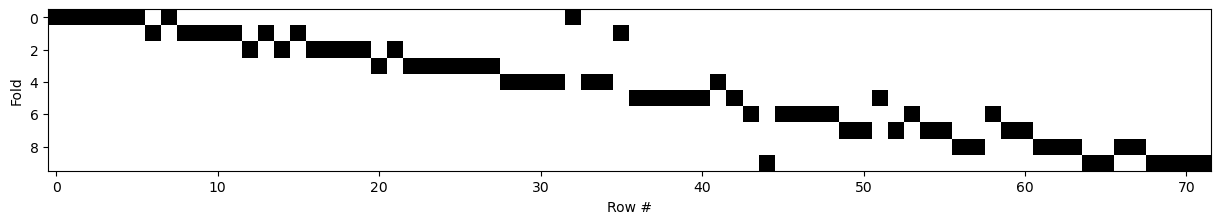

In [ ]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


''

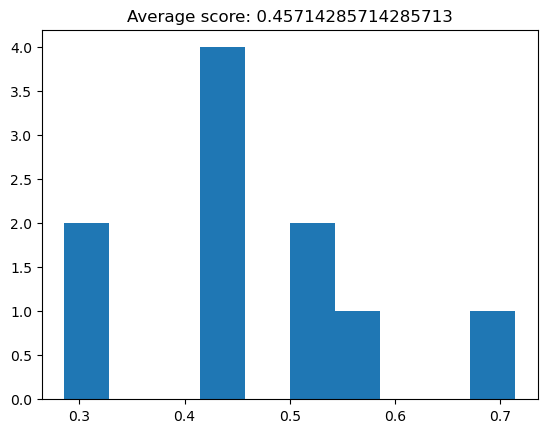

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

# K-NN 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.80, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(pd.DataFrame(X_train).info())
print(pd.DataFrame(y_train).info())


(14, 2)
(14,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14 non-null     object
 1   1       14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       14 non-null     category
dtypes: category(1)
memory usage: 346.0 bytes
None


In [ ]:
from sklearn.impute import SimpleImputer
#replace the missing values 
# Apply imputation to handle missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


In [ ]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the training set
train_predictions = knn.predict(X_train)

# Calculate the training accuracy
train_accuracy = sum(train_predictions == y_train) / len(y_train)

# Make predictions on the test set
test_predictions = knn.predict(X_test)

# Calculate the test accuracy
test_accuracy = sum(test_predictions == y_test) / len(y_test)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Test Predictions:", test_predictions)
print("Test:", X_test)
print("Train predictions:", train_predictions)
print("Train:", X_train)


Training Accuracy: 0.7142857142857143
Test Accuracy: 0.0
Test Predictions: [1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
Test: [[2.70000000e+01 9.35445103e-01]
 [4.70000000e+01 6.01425015e-01]
 [9.00000000e+01 8.71920337e-01]
 [2.50000000e+01 8.60674736e-01]
 [7.90000000e+01 7.76118122e-01]
 [5.60000000e+01 9.06515581e-01]
 [9.00000000e+00 3.79431711e-02]
 [4.00000000e+01 8.29084042e-01]
 [5.20000000e+01 7.58863422e-01]
 [5.60000000e+01 8.65310327e-01]
 [5.00000000e+01 4.81843935e-01]
 [1.05000000e+02 8.54236415e-01]
 [2.40000000e+01 1.63533351e-01]
 [6.10000000e+01 7.43153919e-01]
 [1.50000000e+01 8.84968667e-01]
 [3.40000000e+01 7.74572925e-01]
 [1.10000000e+01 1.00000000e+00]
 [6.10000000e+01 7.44613272e-01]
 [7.30000000e+01 6.00909949e-01]
 [4.00000000e+01 8.47969783e-01]
 [6.20000000e+01 8.25821959e-01]
 [3.70000000e+01 8.86513864e-01]
 [1.10000000e+01 7.58434200e-01]
 [4.30000000e+01 9.52013048e-01]
 [1.1800

C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

This suggests that the KNN model might be overfitting the training data and performing poorly on unseen data.

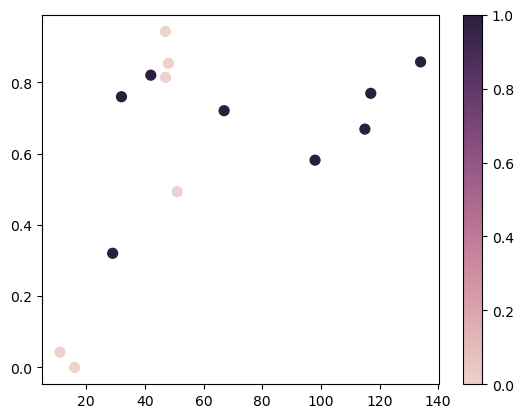

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_train[:,0], X_train[:, 1], c=train_predictions, s=50, cmap=cmap)
f.colorbar(points)
plt.show()